In [308]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [484]:
# TODO
# Implement the linear regression using gradient descent by only numpy

class LinearRegression:
    
    def __init__(self):
        
        print("Don't cheat.")
        self.epoch = []
        self.train_loss = []
        self.weights = None

    def fit(self, X, y, lr=0.001, epochs=100, batch_size=1):
        #if X.ndim == 1:
        #    X = X.reshape(X.shape[0], 1)
        #m, n = X.shape
        #X = np.hstack((np.ones((m, 1)), X))
        #y = y.reshape(y.shape[0], 1)
        #self.weights = np.zeros((n+1, 1))
        #self.weights = self.weights.reshape(X.shape[0], 1)
        self.weights = np.zeros(X.shape[1] + 1)
        print("self.weights", self.weights)
        
        for epoch in range(epochs):
            for batch in range(len(X)//batch_size):
                
                X_batch = X[batch * batch_size: (batch + 1) * batch_size]
                y_batch = y[batch * batch_size: (batch + 1) * batch_size]
                
                #y_pred = np.dot(X_batch, self.weights)
                y_pred = self.predict(X_batch)
                error = y_pred - y_batch
                #gradient = np.dot(X_batch.T, error) / len(X_batch)
                #self.weights -= lr * gradient
                D_weight = 2 * np.mean(X_batch * error)  # Derivative wrt m
                D_Intercept = 2 * np.mean(error)  # Derivative wrt c
                #print("D_m", D_m)
                #print("D_c", D_c)
                
                self.weights[:-1] -= lr * D_weight  # Update m
                self.weights[-1] -= lr * D_Intercept  # Update c
                
                
            self.epoch.append(epoch)
            self.train_loss.append(self.get_loss(X, y))
        '''
        plt.plot(self.weights[0],self.weights[1],'o-',color='red')
        plt.xlabel('intercept',color='black')
        plt.ylabel('weight',color='black')
        plt.xticks(color='black')
        plt.yticks(color='black')
        plt.show()
        '''

    def get_loss(self, X, y):
        #y_pred = np.dot(X, self.weights)
        y_pred = self.predict(X)
        error = y_pred - y
        #print("error: ", error[0])
        #return np.mean(np.square(error))
        return np.mean(error ** 2)

    def predict(self, X):
        #if X.ndim == 1:
        #    X = X.reshape(X.shape[0], 1)
        #m, n = X.shape
        #X = np.hstack((np.ones((m, 1)), X))
        
        #return np.dot(X, self.weights)
        return self.weights[-1] + self.weights[:-1] * X
                
    def evaluate(self, X, y):
        if X.ndim == 1:
            X = X.reshape(X.shape[0], 1)
        m, n = X.shape
        X = np.hstack((np.ones((m, 1)), X))
        y = y.reshape(y.shape[0], 1)
        
        #y_pred = np.dot(X, self.weights)
        y_pred = self.predict(X)
        error = y_pred - y
        #return np.mean(np.square(error))
        return np.mean(error ** 2)
        
    def plot_curve(self):
        # self.epoch and self.train_loss may be helpful here. 
        plt.plot(self.epoch, self.train_loss, label='Training Loss')
        plt.title('Training Curve')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

# Load data & data pre-processing

In [377]:
df_train = pd.DataFrame(pd.read_csv("./regression_train.csv"))
df_val   = pd.DataFrame(pd.read_csv("./regression_val.csv"))
df_test  = pd.DataFrame(pd.read_csv("./regression_test.csv"))

In [378]:
df_train.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [379]:
df_test.head()

,age,sex,bmi,children,smoker,region,charges
0,33,male,30.25,0,no,southeast,NaN
1,19,female,32.49,0,yes,northwest,NaN
2,50,male,37.07,1,no,southeast,NaN
3,41,female,32.60,3,no,southwest,NaN
4,52,female,24.86,0,no,southeast,NaN


In [380]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 938 entries, 0 to 937
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       938 non-null    int64  
 1   sex       938 non-null    object 
 2   bmi       938 non-null    float64
 3   children  938 non-null    int64  
 4   smoker    938 non-null    object 
 5   region    938 non-null    object 
 6   charges   938 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 51.4+ KB


In [381]:
# TODO
# You may do the labelEncoder here

#### For multiple features, please use the following settings.####
# sex.female -> 0
# sex.male -> 1

# smoker.no -> 0
# smoker.yes -> 1

# region.northeast -> 0
# region.northwest -> 1
# region.southeast -> 2
# region.southwest -> 3
##################################################################


# You may try different label encoding for training your own model


sex_map = {'female': 0, 'male': 1}
smoker_map = {'no': 0, 'yes': 1}
region_map = {'northeast': 0, 'northwest': 1, 'southeast': 2, 'southwest': 3}


#df_train['sex_encoded'] = df_train['sex'].map(sex_map)
#df_train['smoker_encoded'] = df_train['smoker'].map(smoker_map)

df_train['sex'] = df_train['sex'].map(sex_map)
df_train['smoker'] = df_train['smoker'].map(smoker_map)
df_train['region'] = df_train['region'].map(region_map)

df_val['sex'] = df_val['sex'].map(sex_map)
df_val['smoker'] = df_val['smoker'].map(smoker_map)
df_val['region'] = df_val['region'].map(region_map)

df_test['sex'] = df_test['sex'].map(sex_map)
df_test['smoker'] = df_test['smoker'].map(smoker_map)
df_test['region'] = df_test['region'].map(region_map)

# Print the DataFrame
print(df_train)

     age  sex     bmi  children  smoker  region      charges
0     19    0  27.900         0       1       3  16884.92400
1     18    1  33.770         1       0       2   1725.55230
2     28    1  33.000         3       0       2   4449.46200
3     33    1  22.705         0       0       1  21984.47061
4     32    1  28.880         0       0       1   3866.85520
..   ...  ...     ...       ...     ...     ...          ...
933   45    0  35.300         0       0       3   7348.14200
934   32    1  37.180         2       0       2   4673.39220
935   59    0  27.500         0       0       3  12233.82800
936   44    1  29.735         2       0       0  32108.66282
937   39    0  24.225         5       0       1   8965.79575

[938 rows x 7 columns]


# Single feature (using bmi)

In [382]:
# Do not modify here

x_train = df_train.drop(['charges'], axis=1)
y_train = df_train['charges']
x_train = x_train[['bmi']]

x_val = df_val.drop(['charges'], axis=1)
y_val = df_val['charges']
x_val = x_val[['bmi']]

x_test = df_test.drop(['charges'], axis=1)
x_test = x_test[['bmi']]

In [383]:
# TODO
# You may convert data to NumPy here 

#print('x_train:', x_train)
#print('y_train:', y_train)

x_train = np.array(x_train)
y_train = np.array(y_train)

x_val = np.array(x_val)
y_val = np.array(y_val)

x_test = np.array(x_test)
#y_test_np = np.array(y_test)

#print('x_train_np:', x_train)
#print('y_train_np:', y_train)

In [792]:
batch_size = x_train.shape[0]
print(batch_size)

# TODO
# Tune the parameters
# Refer to slide page 9
lr = 0.01
epochs = 10

linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train, lr=lr, epochs=epochs, batch_size=batch_size)

938
Don't cheat.
self.weights [0. 0.]


In [793]:
print("Intercepts: ", linear_reg.weights[-1])
print("Weights: ", linear_reg.weights[:-1])
#Intercepts:  1382.5371644361621
#Weights:  [380.13464539]])
#print("Weights: ", linear_reg.weights)

Intercepts:  -71879236176029.0
Weights:  [-2.30522033e+15]


In [795]:
print('training loss: ', linear_reg.evaluate(x_train, y_train))

training loss:  2.6412623866233586e+33


In [796]:
print('validation loss: ', linear_reg.evaluate(x_val, y_val))

validation loss:  2.5180065648530892e+33


In [797]:
linear_reg.weights = [380.13464539, 1382.5371644361621]
print('target training loss: ', linear_reg.evaluate(x_train, y_train))
print('target validation loss: ', linear_reg.evaluate(x_val, y_val))

target training loss:  206775485.27349687
target validation loss:  217130316.64340568


In [798]:
test_pred = linear_reg.predict(x_test)
#print("test_pred", test_pred)

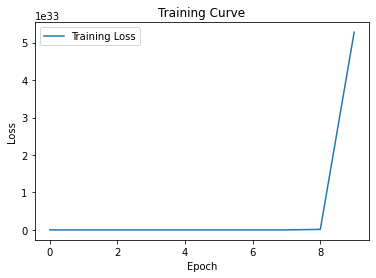

In [799]:
linear_reg.plot_curve()

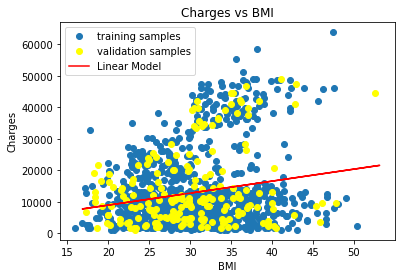

In [800]:
# Use matplotlib to plot the predicted line with the training and validation samples

# TODO

#print(x_train)
plt.plot(x_train, y_train, 'o', label='training samples')
plt.plot(x_val, y_val, 'o', label='validation samples', color='yellow')
#plt.plot(linear_reg.weights[:-1], linear_reg.weights[-1], 'o-', label='Linear Model', color='red')
plt.plot(x_test, test_pred, label='Linear Model', color='red')
plt.title('Charges vs BMI')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend()
plt.show()

# plt.show()

# Multiple features

In [32]:
# Do not modify here

x_train = df_train.drop(['charges'], axis=1)
y_train = df_train['charges']

x_val = df_val.drop(['charges'], axis=1)
y_val = df_val['charges']

x_test = df_test.drop(['charges'], axis=1)

In [33]:
# TODO
# You may convert data to NumPy here 

x_train = np.array(x_train)
y_train = np.array(y_train)

x_val = np.array(x_val)
y_val = np.array(y_val)

x_test = np.array(x_test)
#y_test_np = np.array(y_test)

#print('x_train_np:', x_train_np)
#print('y_train_np:', y_train_np)

In [34]:
batch_size = x_train.shape[0]

# TODO
# Tune the parameters
# Refer to slide page 10
lr = 0.0001
epochs = 1000

linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train, lr=lr, epochs=epochs, batch_size=batch_size)

Don't cheat.


In [35]:
print("Intercepts: ", linear_reg.weights[-1])
print("Weights: ", linear_reg.weights[:-1])
#Intercepts:  -11857.057377634748
#Weights:  [  259.8508643   -383.54524271   333.33251548   442.55747876
# 24032.22099619  -416.0143858 ]

Intercepts:  [-68.69911052]
Weights:  [[-16.75752734]
 [225.51918894]
 [ 14.5172344 ]
 [141.94339237]
 [ 33.68083174]
 [371.80361537]]


In [36]:
print('training loss: ', linear_reg.evaluate(x_train, y_train))

training loss:  124604859.88902822


In [37]:
print('validation loss: ', linear_reg.evaluate(x_val, y_val))

validation loss:  132477617.4239376


In [38]:
test_pred = linear_reg.predict(x_test)

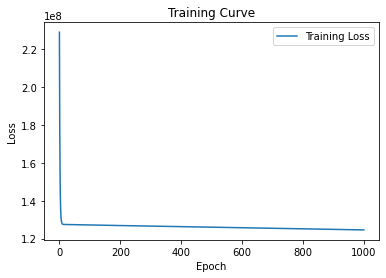

In [39]:
linear_reg.plot_curve()

# Train your own model and predict for testing data.

In [40]:
test_pred = linear_reg.predict(x_test)
print("test_pred shape: ", test_pred.shape)
assert test_pred.shape == (200, 1)

test_pred shape:  (200, 1)


# Output the csv file

In [41]:
df_test = pd.DataFrame(pd.read_csv("./regression_test.csv"))
df_test["charges"] = test_pred
df_test.to_csv("sample_output.csv")